In [11]:
import matplotlib.pyplot as plt
import numpy as np
import copy

def plot_roc_curves(y, y_proba):
    fpr, tpr, roc_auc = dict(), dict(), dict()
    all_y_train_i = np.empty(shape=(0, len(y)), dtype=int)
    all_y_predict_proba = np.empty(shape=(0, len(y)), dtype=int)

    # http://benalexkeen.com/scoring-classifier-models-using-scikit-learn/
    for i in range(10):
        y_train_i = list(map(lambda x: 1 if x == i else 0, y))
        all_y_train_i = np.append(all_y_train_i, [copy.deepcopy(y_train_i)], axis=0)
        all_y_predict_proba = np.append(all_y_predict_proba, [y_proba[:, i]], axis=0)
        fpr[i], tpr[i], _ = roc_curve(y_train_i, y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    plt.figure(figsize=(8, 6))
    colors = ['darkorange', 'forestgreen', 'royalblue', 'firebrick', 'gold', 'deepskyblue', 'darkviolet', 'peru', 'deeppink', 'yellowgreen']
    for lbl in range(10):
        plt.plot(fpr[lbl], tpr[lbl], color=colors[lbl], linewidth=2, label=f'Label {lbl} (area = {round(roc_auc[lbl], 2)})')
    plt.plot([0, 1], [0, 1], color='navy', linewidth=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves per label')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
import pandas as pd
import warnings; warnings.simplefilter('ignore')

training_dataSet = pd.read_csv('DecisionTrees/src/main/resources/trainingData_top10.csv')
testing_dataSet = pd.read_csv('DecisionTrees/src/main/resources/testingData_top10.csv')

training_dataSet_4000 = pd.read_csv('DecisionTrees/src/main/resources/trainingData_top10_4000.csv')
testing_dataSet_4000 = pd.read_csv('DecisionTrees/src/main/resources/testingData_top10_4000.csv')

training_dataSet_9000 = pd.read_csv('DecisionTrees/src/main/resources/trainingData_top10_9000.csv')
testing_dataSet_9000 = pd.read_csv('DecisionTrees/src/main/resources/testingData_top10_9000.csv')

training_dataSet['label'] = training_dataSet['label'].map({'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9})
testing_dataSet['label'] = testing_dataSet['label'].map({'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9})

training_dataSet_4000['label'] = training_dataSet_4000['label'].map({'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9})
testing_dataSet_4000['label'] = testing_dataSet_4000['label'].map({'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9})

training_dataSet_9000['label'] = training_dataSet_9000['label'].map({'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9})
testing_dataSet_9000['label'] = testing_dataSet_9000['label'].map({'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9})

In [ ]:
y_train = training_dataSet['label']
y_test = testing_dataSet['label']
X_train = training_dataSet.drop("label", axis=1)
X_test = testing_dataSet.drop("label", axis=1)

y_train_4000 = training_dataSet_4000['label']
y_test_4000 = testing_dataSet_4000['label']
X_train_4000 = training_dataSet_4000.drop("label", axis=1)
X_test_4000 = testing_dataSet_4000.drop("label", axis=1)

y_train_9000 = training_dataSet_9000['label']
y_test_9000 = testing_dataSet_9000['label']
X_train_9000 = training_dataSet_9000.drop("label", axis=1)
X_test_9000 = testing_dataSet_9000.drop("label", axis=1)

In [3]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV

In [1]:
import pandas as pd

training_dataSet = pd.read_csv('data/trainingData_top10.csv')
testing_dataSet = pd.read_csv('data/testingData_top10.csv')
training_dataSet['label'] = training_dataSet['label'].map({'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9})
testing_dataSet['label'] = testing_dataSet['label'].map({'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9})
y_train = training_dataSet['label']
y_test = testing_dataSet['label']
X_train = training_dataSet.drop("label", axis=1)
X_test = testing_dataSet.drop("label", axis=1)

training_dataSet_4000 = pd.read_csv('data/trainingData_top10_4000.csv')
testing_dataSet_4000 = pd.read_csv('data/testingData_top10_4000.csv')
training_dataSet_4000['label'] = training_dataSet_4000['label'].map({'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9})
testing_dataSet_4000['label'] = testing_dataSet_4000['label'].map({'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9})
y_train_4000 = training_dataSet_4000['label']
y_test_4000 = testing_dataSet_4000['label']
X_train_4000 = training_dataSet_4000.drop("label", axis=1)
X_test_4000 = testing_dataSet_4000.drop("label", axis=1)

training_dataSet_9000 = pd.read_csv('data/trainingData_top10_9000.csv')
testing_dataSet_9000 = pd.read_csv('data/testingData_top10_9000.csv')
training_dataSet_9000['label'] = training_dataSet_9000['label'].map({'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9})
testing_dataSet_9000['label'] = testing_dataSet_9000['label'].map({'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9})
y_train_9000 = training_dataSet_9000['label']
y_test_9000 = testing_dataSet_9000['label']
X_train_9000 = training_dataSet_9000.drop("label", axis=1)
X_test_9000 = testing_dataSet_9000.drop("label", axis=1)

[[ 978  281   35   18   11    5   38    8   32    4]
 [ 313 1290   57   26   34   21   57   10   45    7]
 [  37   44  311    4    2    4    5    4    7    2]
 [  13   18    3 1233   17   11    4    1   19    1]
 [  17   27    1   22 1918   75    4    4   26    6]
 [   5   18    2    5   47 2055    0    3   18    7]
 [  24   38    5    9    1    1  699    0    1    2]
 [  13    5    3    0    6    3    1  197    3    9]
 [  25   45   13   19   23   15    3    9 1912    6]
 [   4    7    1    1    3    2    2    5    6  269]]
              precision    recall  f1-score   support

           0       0.68      0.69      0.69      1410
           1       0.73      0.69      0.71      1860
           2       0.72      0.74      0.73       420
           3       0.92      0.93      0.93      1320
           4       0.93      0.91      0.92      2100
           5       0.94      0.95      0.94      2160
           6       0.86      0.90      0.88       780
           7       0.82      0.82   

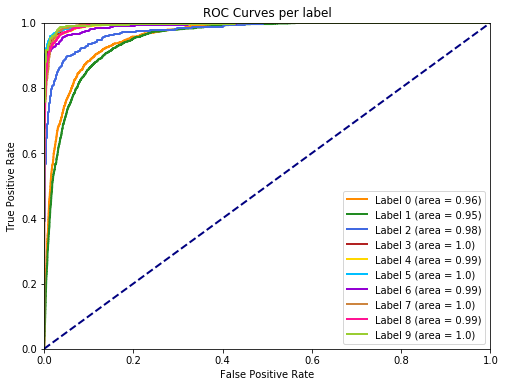

In [12]:
# MULTILAYER PERCEPTRON: 10-FOLD CROSS VALIDATION

clf = MLPClassifier()
y_pred_cross = cross_val_predict(clf, X_train, y_train, cv=10)

print(confusion_matrix(y_train, y_pred_cross))
print(classification_report(y_train, y_pred_cross))

y_pred_cross_proba = cross_val_predict(clf, X_train, y_train, cv=10, method='predict_proba')

plot_roc_curves(y_train, y_pred_cross_proba)

[[346  55  11   3   1   2  14   0  15   3]
 [230 309  20  18   4   4  33   2   9   1]
 [ 28  20  93   0   1   0   4   2   1   1]
 [ 18  15   3 344  15   5   2   0  18   0]
 [ 12  17   1  10 593  16   0  13  26   2]
 [  8   3   2   2  27 670   1   2   5   0]
 [ 20   6   2   0   1   0 236   0   1   4]
 [  0   0   0   4   1   1   2  38   0  14]
 [ 16  33  21  11  26  11   1   3 565   3]
 [ 12  11   2   0   0   1   3  13   8  40]]
              precision    recall  f1-score   support

           0       0.50      0.77      0.61       450
           1       0.66      0.49      0.56       630
           2       0.60      0.62      0.61       150
           3       0.88      0.82      0.85       420
           4       0.89      0.86      0.87       690
           5       0.94      0.93      0.94       720
           6       0.80      0.87      0.83       270
           7       0.52      0.63      0.57        60
           8       0.87      0.82      0.84       690
           9       0.59     

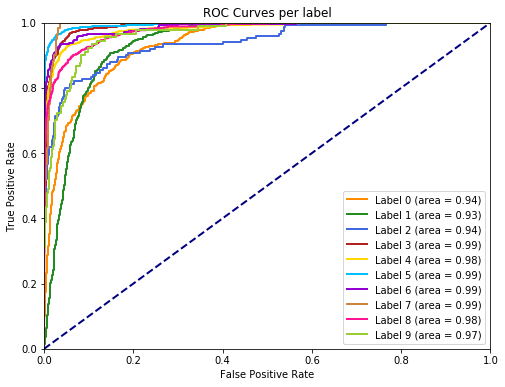

In [13]:
# MULTILAYER PERCEPTRON: TRAINING & TESTING DATA SETS

clf = MLPClassifier()
y_pred_MLP = clf.fit(X_train, y_train).predict(X_test)

print(confusion_matrix(y_test, y_pred_MLP))
print(classification_report(y_test, y_pred_MLP))

y_pred_MLP_proba = clf.predict_proba(X_test)

plot_roc_curves(y_test, y_pred_MLP_proba)

[[ 676  143   14   14    4    1   10    1   21    5]
 [ 275  833   29   29   20   10   16    4   13    5]
 [  44   47  162    1    7    2    1    1    1    2]
 [  11   21    1  718   38    1    5    0   23    3]
 [  17   15    2   20 1250   28    0   10   33    1]
 [   2   17    0    5   79 1281    1    1    8    2]
 [  42   47    5    4    1    0  407    0    1    4]
 [   9    2    1    2    6    3    0   93    3   13]
 [  50   27   24   21   53   26    5    8 1142    3]
 [  20    4    3    0    4    1    1   21    7  123]]
              precision    recall  f1-score   support

           0       0.59      0.76      0.66       889
           1       0.72      0.68      0.70      1234
           2       0.67      0.60      0.64       268
           3       0.88      0.87      0.88       821
           4       0.85      0.91      0.88      1376
           5       0.95      0.92      0.93      1396
           6       0.91      0.80      0.85       511
           7       0.67      0.70   

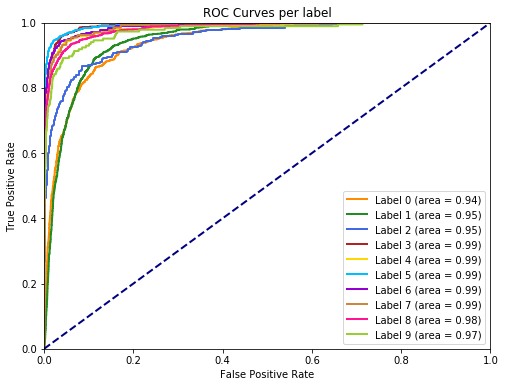

In [14]:
# MULTILAYER PERCEPTRON: TRAINING & TESTING DATA SETS (4000 TRAINING -> TESTING)

clf_4000 = MLPClassifier()
y_pred_MLP = clf_4000.fit(X_train_4000, y_train_4000).predict(X_test_4000)

print(confusion_matrix(y_test_4000, y_pred_MLP))
print(classification_report(y_test_4000, y_pred_MLP))

y_pred_MLP_proba = clf_4000.predict_proba(X_test_4000)

plot_roc_curves(y_test_4000, y_pred_MLP_proba)

[[ 914  343   37   30    8   10   36    6   34   14]
 [ 400 1255   53   75   41   22   56    3   35   14]
 [  68   74  247    5   11    4    5    9    8    4]
 [  19   39    2 1170   53   15    4    3   31   17]
 [  26   58    8   43 1898  117    1    8   56    4]
 [  13   35    6    8   98 2046    1    3   13    9]
 [  54  100    4    7    2    0  652    0    7    9]
 [  19    9    1    2    7    7    0  163   13    7]
 [  52   89   53   38   64   28    6    7 1826   23]
 [  31   22    2    2    6    5    4   13    9  202]]
              precision    recall  f1-score   support

           0       0.57      0.64      0.60      1432
           1       0.62      0.64      0.63      1954
           2       0.60      0.57      0.58       435
           3       0.85      0.86      0.86      1353
           4       0.87      0.86      0.86      2219
           5       0.91      0.92      0.91      2232
           6       0.85      0.78      0.81       835
           7       0.76      0.71   

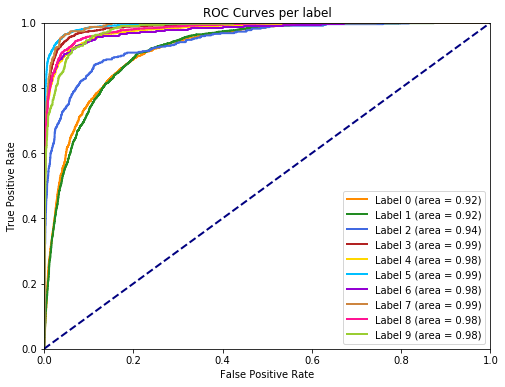

In [15]:
# MULTILAYER PERCEPTRON: TRAINING & TESTING DATA SETS (9000 TRAINING -> TESTING)

clf_9000 = MLPClassifier()
y_pred_MLP = clf_9000.fit(X_train_9000, y_train_9000).predict(X_test_9000)

print(confusion_matrix(y_test_9000, y_pred_MLP))
print(classification_report(y_test_9000, y_pred_MLP))

y_pred_MLP_proba = clf_9000.predict_proba(X_test_9000)

plot_roc_curves(y_test_9000, y_pred_MLP_proba)

In [5]:
possible_parameters = {
    'hidden_layer_sizes': [(50, 20), (100,)],
    'alpha': [0.0001, 0.00005],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.001, 0.0005],
    'beta_1': [0.9, 0.99],
    'beta_2': [0.999, 0.5],
    'epsilon': [1e-8, 5e-9, 2e-9]
}

In [6]:
import warnings; warnings.simplefilter('ignore')

clf_KFold = MLPClassifier(max_iter=1000)
clf_KFold = GridSearchCV(clf_KFold, possible_parameters, n_jobs=4, verbose=10)
cross_val_predict(clf_KFold, X_train, y_train, cv=10)

cv = clf_KFold.cv_results_
tab_KFold = pd.DataFrame({
    'rank_test_score': cv['rank_test_score'],
    'mean_train_score': cv['mean_train_score'],
    'mean_test_score': cv['mean_test_score'],
    'hidden_layer_sizes': cv['param_hidden_layer_sizes'],
    'alpha': cv['param_alpha'],
    'learning_rate': cv['param_learning_rate'],
    'learning_rate_init': cv['param_learning_rate_init'],
    'beta_1': cv['param_beta_1'],
    'beta_2': cv['param_beta_2'],
    'epsilon': cv['param_epsilon']
})
tab_KFold.sort_values(['rank_test_score']).to_csv('results_KFold.csv', encoding='utf-8', sep=',', index=False)
tab_KFold.sort_values(['rank_test_score']).head(10)

Fitting 3 folds for each of 192 candidates, totalling 576 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   52.8s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  2.8min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  3.3min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:  4.1min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  4.9min
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:  5.3min
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  5.8min
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:  6.2min
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  6.7min
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:  7.3min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  8.4min
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed: 10.7min
[Parallel(

Fitting 3 folds for each of 192 candidates, totalling 576 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   33.7s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  2.5min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  2.9min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:  3.8min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  4.5min
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:  5.2min
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  5.5min
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:  6.0min
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  6.3min
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:  7.0min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  8.3min
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed:  9.8min
[Parallel(

Fitting 3 folds for each of 192 candidates, totalling 576 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   36.3s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  2.8min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  3.3min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:  4.3min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  5.0min
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:  5.7min
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  6.1min
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:  6.7min
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  7.5min
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:  8.7min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 10.1min
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed: 11.6min
[Parallel(

Fitting 3 folds for each of 192 candidates, totalling 576 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   41.2s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  2.9min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  3.5min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:  4.4min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  5.5min
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:  6.1min
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  6.8min
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:  7.5min
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  8.1min
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:  9.1min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 11.2min
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed: 13.3min
[Parallel(

Fitting 3 folds for each of 192 candidates, totalling 576 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   35.8s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  2.8min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  3.4min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:  4.4min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  5.1min
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:  5.6min
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  6.1min
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:  6.7min
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  7.1min
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:  7.9min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  9.2min
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed: 11.2min
[Parallel(

Fitting 3 folds for each of 192 candidates, totalling 576 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   55.6s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  2.3min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  2.8min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  4.2min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  5.2min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:  6.7min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  8.1min
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:  9.1min
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  9.8min
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed: 10.7min
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed: 11.7min
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed: 13.0min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 15.1min
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed: 17.7min
[Parallel(

Fitting 3 folds for each of 192 candidates, totalling 576 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  2.9min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  3.7min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  5.1min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  6.2min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:  7.9min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  9.4min
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed: 10.4min
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed: 11.6min
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed: 12.6min
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed: 13.5min
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed: 15.0min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 17.4min
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed: 20.5min
[Parallel(

Fitting 3 folds for each of 192 candidates, totalling 576 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   52.9s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  2.3min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  3.5min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  4.1min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:  5.1min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  6.1min
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:  6.8min
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  7.7min
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:  8.3min
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  8.7min
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:  9.3min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 11.1min
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed: 13.0min
[Parallel(

Fitting 3 folds for each of 192 candidates, totalling 576 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   41.6s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  2.7min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  3.3min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:  4.1min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  5.0min
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:  5.4min
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  6.1min
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:  6.9min
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  7.4min
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:  8.5min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 10.3min
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed: 12.5min
[Parallel(

Fitting 3 folds for each of 192 candidates, totalling 576 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   29.2s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   55.3s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  2.3min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  2.9min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:  3.7min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  4.5min
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:  5.0min
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  5.4min
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:  5.9min
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  6.3min
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:  6.9min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  8.1min
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed:  9.4min
[Parallel(

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

In [8]:
import warnings; warnings.simplefilter('ignore')

clf = MLPClassifier(max_iter=1000)
clf = GridSearchCV(clf, possible_parameters, n_jobs=4, verbose=10)
clf.fit(X_train, y_train)

cv = clf.cv_results_
tab = pd.DataFrame({
    'rank_test_score': cv['rank_test_score'],
    'mean_train_score': cv['mean_train_score'],
    'mean_test_score': cv['mean_test_score'],
    'hidden_layer_sizes': cv['param_hidden_layer_sizes'],
    'alpha': cv['param_alpha'],
    'learning_rate': cv['param_learning_rate'],
    'learning_rate_init': cv['param_learning_rate_init'],
    'beta_1': cv['param_beta_1'],
    'beta_2': cv['param_beta_2'],
    'epsilon': cv['param_epsilon']
})
tab.sort_values(['rank_test_score']).to_csv('results_all.csv', encoding='utf-8', sep=',', index=False)
tab.sort_values(['rank_test_score']).head(10)

Fitting 3 folds for each of 192 candidates, totalling 576 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   34.5s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   59.4s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  2.4min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  2.9min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:  3.8min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  4.5min
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:  4.8min
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  5.3min
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:  6.0min
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  6.4min
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:  7.1min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  8.4min
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed:  9.9min
[Parallel(

,rank_test_score,mean_train_score,mean_test_score,hidden_layer_sizes,alpha,learning_rate,learning_rate_init,beta_1,beta_2,epsilon
13,1,0.996130,0.855055,"(100,)",0.0001,constant,0.0005,0.9,0.999,5e-09
100,2,0.986888,0.854739,"(100,)",5e-05,constant,0.001,0.9,0.999,1e-08
20,3,0.982820,0.854107,"(100,)",0.0001,constant,0.001,0.9,0.999,2e-09
70,4,0.983886,0.852844,"(100,)",0.0001,adaptive,0.001,0.99,0.999,2e-09
52,5,0.985545,0.851817,"(100,)",0.0001,constant,0.001,0.99,0.999,1e-08
6,6,0.984044,0.851580,"(100,)",0.0001,adaptive,0.001,0.9,0.999,1e-08
150,7,0.987875,0.851106,"(100,)",5e-05,adaptive,0.001,0.99,0.999,1e-08
62,8,0.989139,0.850632,"(100,)",0.0001,adaptive,0.001,0.99,0.999,5e-09
149,9,0.993207,0.850316,"(100,)",5e-05,constant,0.0005,0.99,0.999,1e-08
60,10,0.984400,0.850079,"(100,)",0.0001,constant,0.001,0.99,0.999,5e-09


In [9]:
import warnings; warnings.simplefilter('ignore')

clf_4000 = MLPClassifier(max_iter=1000)
clf_4000 = GridSearchCV(clf_4000, possible_parameters, n_jobs=4, verbose=10)
clf_4000.fit(X_train_4000, y_train_4000)

cv = clf_4000.cv_results_
tab_4000 = pd.DataFrame({
    'rank_test_score': cv['rank_test_score'],
    'mean_train_score': cv['mean_train_score'],
    'mean_test_score': cv['mean_test_score'],
    'hidden_layer_sizes': cv['param_hidden_layer_sizes'],
    'alpha': cv['param_alpha'],
    'learning_rate': cv['param_learning_rate'],
    'learning_rate_init': cv['param_learning_rate_init'],
    'beta_1': cv['param_beta_1'],
    'beta_2': cv['param_beta_2'],
    'epsilon': cv['param_epsilon']
})
tab_4000.sort_values(['rank_test_score']).to_csv('results_4000.csv', encoding='utf-8', sep=',', index=False)
tab_4000.sort_values(['rank_test_score']).head(10)

Fitting 3 folds for each of 192 candidates, totalling 576 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   26.6s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   47.1s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  2.7min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:  3.4min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  4.1min
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:  4.5min
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  4.9min
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:  5.2min
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  5.5min
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:  5.8min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  6.9min
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed:  8.2min
[Parallel(

,rank_test_score,mean_train_score,mean_test_score,hidden_layer_sizes,alpha,learning_rate,learning_rate_init,beta_1,beta_2,epsilon
150,1,0.998036,0.844111,"(100,)",5e-05,adaptive,0.001,0.99,0.999,1e-08
54,2,0.991858,0.839954,"(100,)",0.0001,adaptive,0.001,0.99,0.999,1e-08
68,3,0.996651,0.839838,"(100,)",0.0001,constant,0.001,0.99,0.999,2e-09
52,4,0.996477,0.839607,"(100,)",0.0001,constant,0.001,0.99,0.999,1e-08
61,5,0.999365,0.837760,"(100,)",0.0001,constant,0.0005,0.99,0.999,5e-09
108,5,0.981409,0.837760,"(100,)",5e-05,constant,0.001,0.9,0.999,5e-09
148,5,0.986431,0.837760,"(100,)",5e-05,constant,0.001,0.99,0.999,1e-08
156,8,0.986602,0.837067,"(100,)",5e-05,constant,0.001,0.99,0.999,5e-09
166,9,0.983195,0.836028,"(100,)",5e-05,adaptive,0.001,0.99,0.999,2e-09
101,10,0.996708,0.835335,"(100,)",5e-05,constant,0.0005,0.9,0.999,1e-08


In [7]:
import warnings; warnings.simplefilter('ignore')

clf_9000 = MLPClassifier(max_iter=1000)
clf_9000 = GridSearchCV(clf_9000, possible_parameters, n_jobs=4, verbose=10)
clf_9000.fit(X_train_9000, y_train_9000)

cv = clf_9000.cv_results_
tab_9000= pd.DataFrame({
    'rank_test_score': cv['rank_test_score'],
    'mean_train_score': cv['mean_train_score'],
    'mean_test_score': cv['mean_test_score'],
    'hidden_layer_sizes': cv['param_hidden_layer_sizes'],
    'alpha': cv['param_alpha'],
    'learning_rate': cv['param_learning_rate'],
    'learning_rate_init': cv['param_learning_rate_init'],
    'beta_1': cv['param_beta_1'],
    'beta_2': cv['param_beta_2'],
    'epsilon': cv['param_epsilon']
})
tab_9000.sort_values(['rank_test_score']).to_csv('results_9000.csv', encoding='utf-8', sep=',', index=False)
tab_9000.sort_values(['rank_test_score']).head(10)

Fitting 3 folds for each of 192 candidates, totalling 576 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   15.9s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   26.3s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   38.6s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   48.5s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:  2.3min
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  2.4min
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:  2.5min
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  2.6min
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:  2.8min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  3.4min
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed:  4.2min
[Parallel(

,rank_test_score,mean_train_score,mean_test_score,hidden_layer_sizes,alpha,learning_rate,learning_rate_init,beta_1,beta_2,epsilon
150,1,0.99959,0.809290,"(100,)",5e-05,adaptive,0.001,0.99,0.999,1e-08
54,2,0.99959,0.807650,"(100,)",0.0001,adaptive,0.001,0.99,0.999,1e-08
62,3,0.99959,0.806557,"(100,)",0.0001,adaptive,0.001,0.99,0.999,5e-09
156,4,0.99959,0.806284,"(100,)",5e-05,constant,0.001,0.99,0.999,5e-09
148,5,0.99959,0.805464,"(100,)",5e-05,constant,0.001,0.99,0.999,1e-08
52,6,0.99959,0.804918,"(100,)",0.0001,constant,0.001,0.99,0.999,1e-08
158,7,0.99959,0.804645,"(100,)",5e-05,adaptive,0.001,0.99,0.999,5e-09
164,8,0.99959,0.804372,"(100,)",5e-05,constant,0.001,0.99,0.999,2e-09
70,9,0.99959,0.802732,"(100,)",0.0001,adaptive,0.001,0.99,0.999,2e-09
63,10,0.99959,0.801639,"(100,)",0.0001,adaptive,0.0005,0.99,0.999,5e-09
